In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import model_selection, metrics, datasets, discriminant_analysis, cluster, preprocessing

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
1. Разделите данные на выборку для обучения и тестирования
1. Постройте модель LDA
1. Визуализируйте предсказания для тестовой выборки и центры классов
1. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
1. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

## Linear Discriminant Analysys

In [10]:
#1
df = datasets.load_iris()
X = pd.DataFrame(df['data'], columns=df['feature_names'])
y = df.target

In [30]:
#2
X = X[['sepal length (cm)', 'sepal width (cm)']]

In [31]:
#3
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)

In [35]:
#4
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Score =', round(score, 3))

Score = 0.822


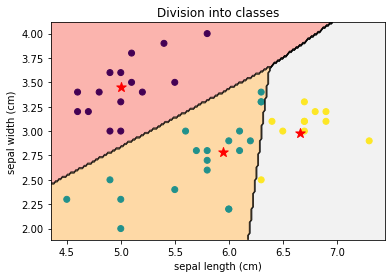

In [74]:
#5
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], marker='*', s=100, c='r')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='Pastel1')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], marker='*', s=100, c='r')

# отделяем друг от друга
plt.contour(xx, yy, Z, linewidths=.5, colors='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Division into classes')
plt.show()

## Cluster Analysys

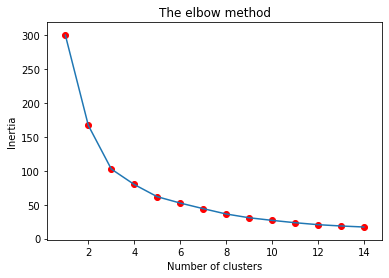

In [85]:
#Scaling
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
#метод локтя
cluster_num = range(1, 15)
inertia = []
for k in cluster_num:
    clf = cluster.KMeans(n_clusters = k)
    clf.fit_predict(X_scaled)
    inertia.append(clf.inertia_)
#строим визуализацию показателя inertia
plt.plot(cluster_num, inertia)
plt.scatter(cluster_num, inertia, marker='o', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The elbow method')
plt.show()
#Стоит выбирать количество кластеров между двойкой и тройкой (ну мы то знаем ответ)

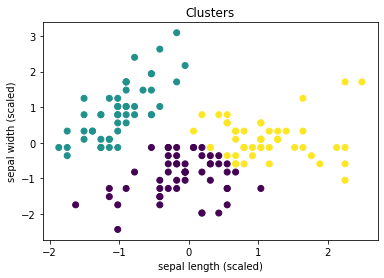

In [92]:
np.random.seed(42)
#создаем и обучаем модель
clf_optim = cluster.KMeans(n_clusters=3)
clusters = clf_optim.fit_predict(X_scaled)
#Визуализируем предсказания
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel('sepal length (scaled)')
plt.ylabel('sepal width (scaled)')
plt.title('Clusters')
plt.show()